In [5]:
!pip install opencv-contrib-python

In [1]:
!pip uninstall -y opencv-python opencv-python-headless opencv-contrib-python

!apt-get install -y cmake
!apt-get install -y libopencv-dev build-essential cmake git pkg-config libgtk-3-dev \
   libavcodec-dev libavformat-dev libswscale-dev libtbb2 libtbb-dev libjpeg-dev \
   libpng-dev libtiff-dev libdc1394-22-dev libv4l-dev v4l-utils \
   libxvidcore-dev libx264-dev libxine2-dev gstreamer1.0-tools \
   libgstreamer-plugins-base1.0-dev libgstreamer-plugins-good1.0-dev \
   libgtk2.0-dev libtiff5-dev libopenexr-dev libatlas-base-dev \
   python3-dev python3-numpy libtbb-dev libeigen3-dev \
   libfaac-dev libmp3lame-dev libtheora-dev libvorbis-dev \
   libxvidcore-dev libx264-dev yasm libopencore-amrnb-dev \
   libopencore-amrwb-dev libv4l-dev libxine2-dev libtesseract-dev \
   liblapacke-dev libopenblas-dev checkinstall

!git clone https://github.com/opencv/opencv.git
!git clone https://github.com/opencv/opencv_contrib.git

%cd opencv
!mkdir build
%cd build
!cmake -D CMAKE_BUILD_TYPE=RELEASE \
       -D CMAKE_INSTALL_PREFIX=/usr/local \
       -D OPENCV_ENABLE_NONFREE=ON \
       -D OPENCV_EXTRA_MODULES_PATH=../../opencv_contrib/modules \
       -D BUILD_EXAMPLES=ON ..
!make -j8
!make install

Streaming output truncated to the last 5000 lines.
[  7%] Building CXX object modules/core/CMakeFiles/opencv_core.dir/matmul.avx512_skx.cpp.o
[  7%] Linking CXX shared library ../../lib/libopencv_core.so
[  7%] Built target opencv_core
[  7%] Processing OpenCL kernels (imgproc)
[  7%] Building CXX object modules/ml/CMakeFiles/opencv_ml.dir/src/ann_mlp.cpp.o
[  7%] Building CXX object modules/ml/CMakeFiles/opencv_ml.dir/src/boost.cpp.o
[  8%] Building CXX object modules/flann/CMakeFiles/opencv_flann.dir/src/flann.cpp.o
[  8%] Building CXX object modules/flann/CMakeFiles/opencv_flann.dir/src/miniflann.cpp.o
[  8%] Building CXX object modules/hdf/CMakeFiles/opencv_hdf.dir/src/hdf5.cpp.o
[  8%] Building CXX object modules/signal/CMakeFiles/opencv_signal.dir/src/signal_resample.cpp.o
[  8%] Building CXX object apps/version/CMakeFiles/opencv_version.dir/opencv_version.cpp.o
[  8%] Building CXX object modules/imgproc/CMakeFiles/opencv_imgproc.dir/src/accum.cpp.o
[  8%] Linking CXX executable 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#***Task 1: SIFT Feature Extraction***

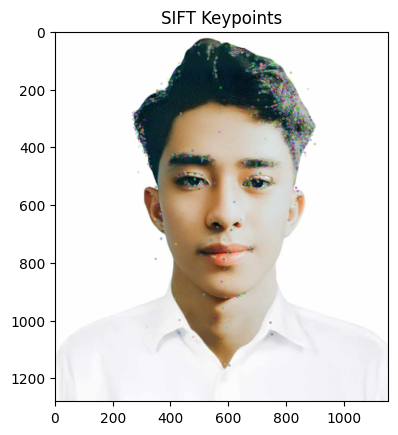

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load the image
image = cv2.imread('/content/drive/MyDrive/IMAGES/original_image1.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
keypoints, descriptors = sift.detectAndCompute(gray_image, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

# Display the image with keypoints
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SIFT Keypoints')
plt.show()

#***Task 2: SURF Feature Extraction***

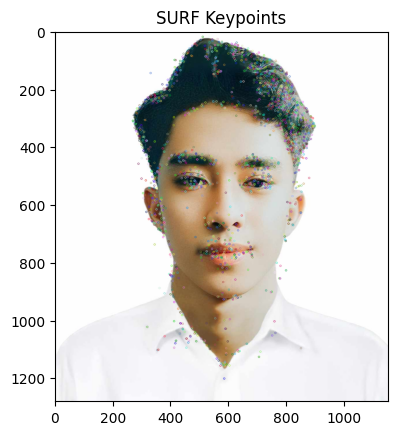

In [4]:
# Load the image
image = cv2.imread('/content/drive/MyDrive/IMAGES/original_image1.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize SURF detector (You might need OpenCV-contrib for SURF)
surf = cv2.xfeatures2d.SURF_create()


# Detect keypoints and descriptors
keypoints, descriptors = surf.detectAndCompute(gray_image, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

# Display the image with keypoints
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SURF Keypoints')
plt.show()

#***Task 3: ORB Feature Extraction***

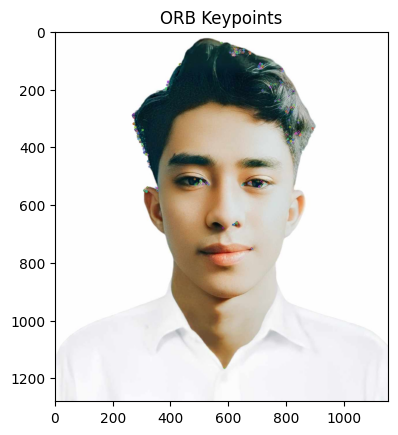

In [6]:
# Load the image
image = cv2.imread('/content/drive/MyDrive/IMAGES/original_image1.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize ORB detector
orb = cv2.ORB_create()

# Detect keypoints and descriptors
keypoints, descriptors = orb.detectAndCompute(gray_image, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

# Display the image with keypoints
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('ORB Keypoints')
plt.show()

#***Task 4: Feature Matching***

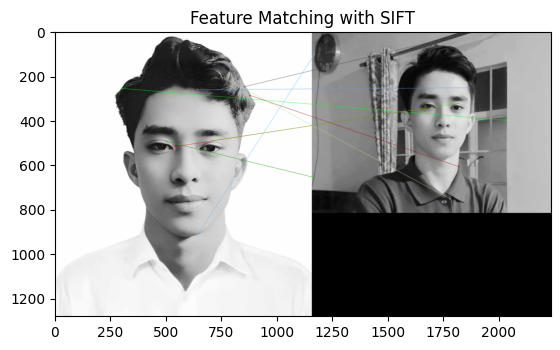

In [7]:
# Load two images
image1 = cv2.imread('/content/drive/MyDrive/IMAGES/original_image1.jpg', 0)
image2 = cv2.imread('/content/drive/MyDrive/IMAGES/original_image2.jpg', 0)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Find keypoints and descriptors with SIFT
keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

# Initialize the matcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Match descriptors
matches = bf.match(descriptors1, descriptors2)

# Sort matches by distance (best matches first)
matches = sorted(matches, key=lambda x: x.distance)

# Draw matches
image_matches = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matches
plt.imshow(image_matches)
plt.title('Feature Matching with SIFT')
plt.show()

#***Task 5: Applications of Feature Matching***

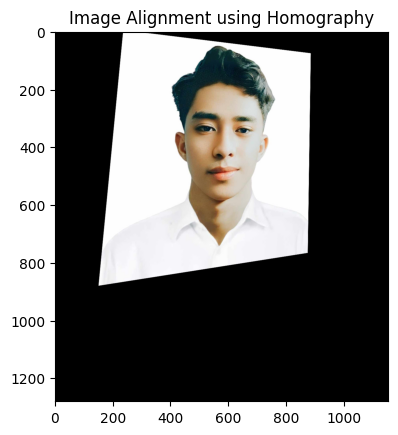

In [9]:
# Load two images
image1 = cv2.imread('/content/drive/MyDrive/IMAGES/original_image1.jpg')
image2 = cv2.imread('/content/drive/MyDrive/IMAGES/original_image2.jpg')

# Convert to grayscale
gray1= cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Detect keypoints and descriptors using SIFT
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

# Match features using BFMatcher
bf = cv2.BFMatcher(cv2.NORM_L2)
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

# Apply ratio test (Lowe's ratio test)
good_matches = []
for m, n in matches:
  if m.distance < 0.75 * n.distance:
    good_matches.append(m)

# Extract location of good matches
src_pts = np.float32(
    [keypoints1[m.queryIdx].pt for m in good_matches]
).reshape(-1, 1, 2)
dst_pts = np.float32(
    [keypoints2[m.trainIdx].pt for m in good_matches]
).reshape(-1, 1, 2)

# Find homography matrix
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# Warp one image to align with the other
h, w, _ = image1.shape
result = cv2.warpPerspective(image1, M, (w, h))

# Display the result
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Image Alignment using Homography')
plt.show()

#***Task 6: Combining Feature Extraction Methods***

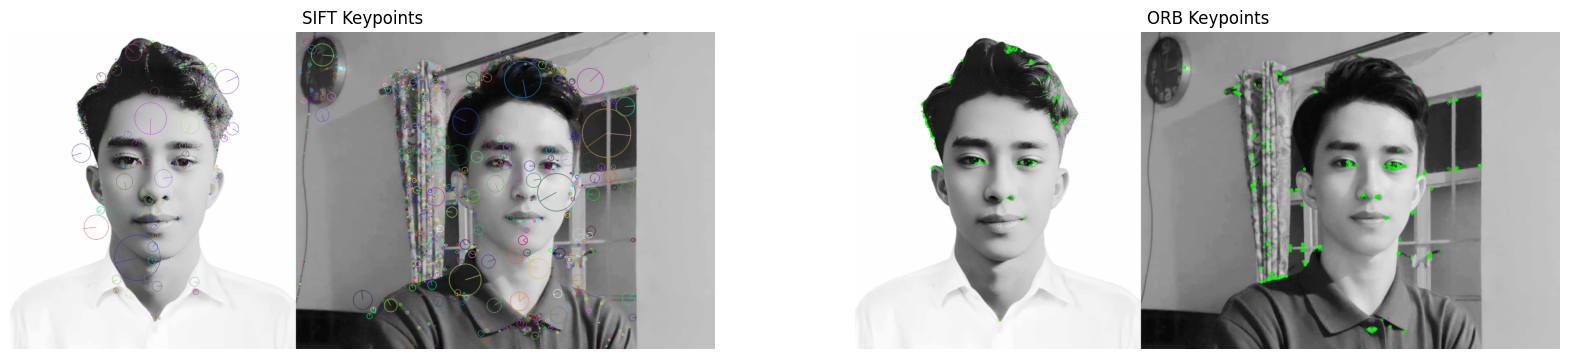

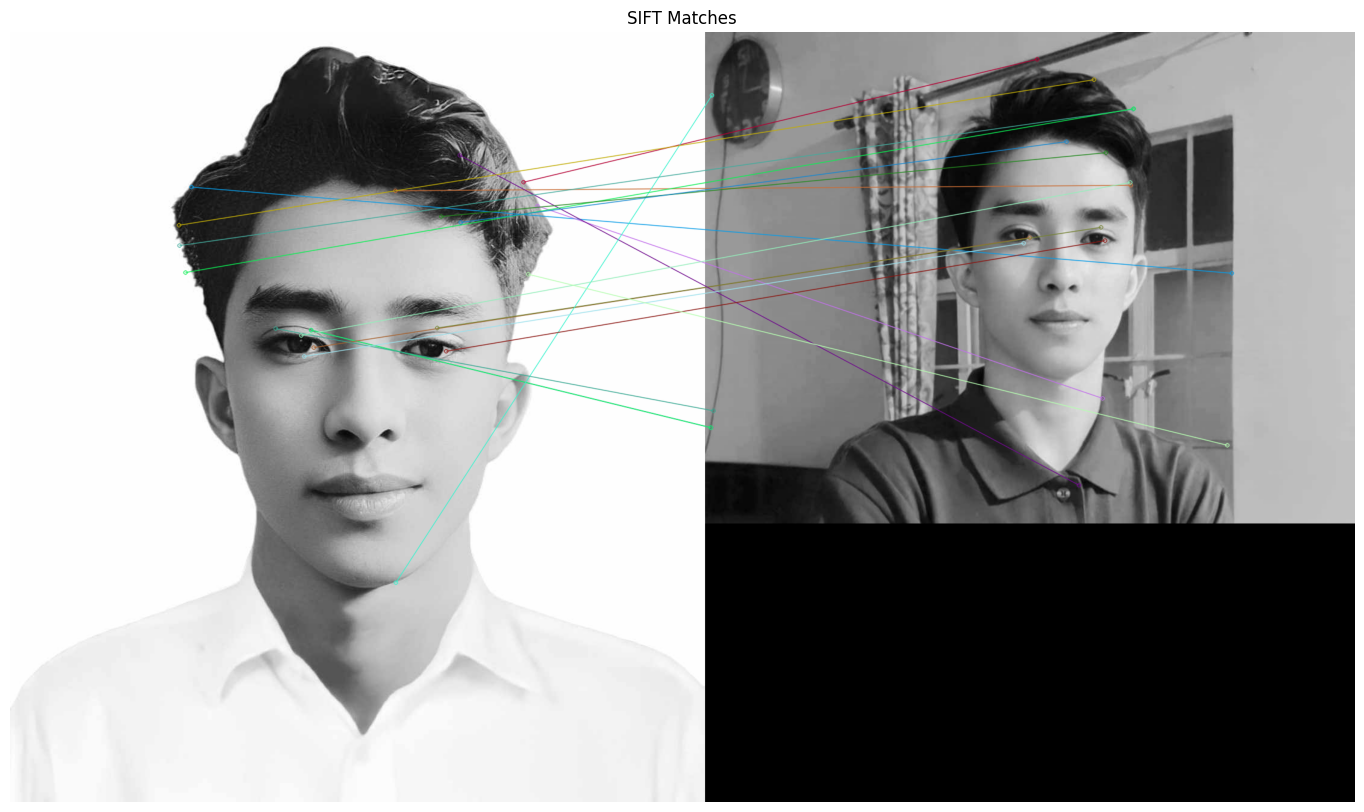

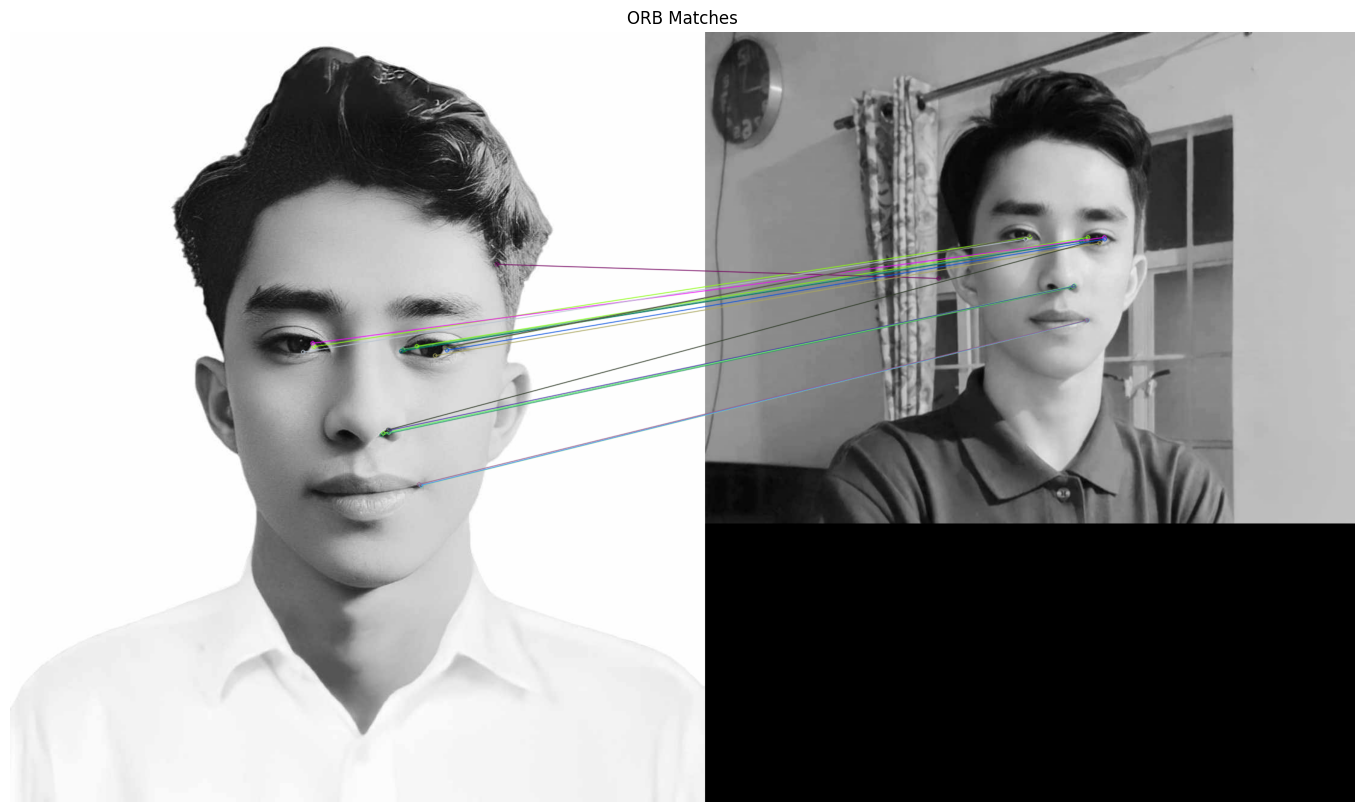

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load two images
image1 = cv2.imread('/content/drive/MyDrive/IMAGES/original_image1.jpg', 0)
image2 = cv2.imread('/content/drive/MyDrive/IMAGES/original_image2.jpg', 0)

# SIFT detector
sift = cv2.SIFT_create()
keypoints1_sift, descriptors1_sift = sift.detectAndCompute(image1, None)
keypoints2_sift, descriptors2_sift = sift.detectAndCompute(image2, None)

# ORB detector
orb = cv2.ORB_create()
keypoints1_orb, descriptors1_orb = orb.detectAndCompute(image1, None)
keypoints2_orb, descriptors2_orb = orb.detectAndCompute(image2, None)

# Draw keypoints for SIFT
image1_sift = cv2.drawKeypoints(image1, keypoints1_sift, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
image2_sift = cv2.drawKeypoints(image2, keypoints2_sift, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Draw keypoints for ORB
image1_orb = cv2.drawKeypoints(image1, keypoints1_orb, None, color=(0, 255, 0), flags=0)
image2_orb = cv2.drawKeypoints(image2, keypoints2_orb, None, color=(0, 255, 0), flags=0)

# Resize images to the same height for combining
def resize_to_same_height(img1, img2):
    h1, w1 = img1.shape[:2]
    h2, w2 = img2.shape[:2]
    new_height = min(h1, h2)
    img1_resized = cv2.resize(img1, (int(w1 * new_height / h1), new_height))
    img2_resized = cv2.resize(img2, (int(w2 * new_height / h2), new_height))
    return img1_resized, img2_resized

image1_sift_resized, image2_sift_resized = resize_to_same_height(image1_sift, image2_sift)
image1_orb_resized, image2_orb_resized = resize_to_same_height(image1_orb, image2_orb)

# Combine images horizontally for visualization
sift_combined = np.hstack((image1_sift_resized, image2_sift_resized))
orb_combined = np.hstack((image1_orb_resized, image2_orb_resized))

# Display SIFT keypoints
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(sift_combined)
plt.title('SIFT Keypoints')
plt.axis('off')

# Display ORB keypoints
plt.subplot(1, 2, 2)
plt.imshow(orb_combined)
plt.title('ORB Keypoints')
plt.axis('off')
plt.show()

# Function to match and draw matches
def match_and_draw(descriptor1, descriptor2, keypoints1, keypoints2, method_name):
    # BFMatcher with default params
    bf = cv2.BFMatcher(cv2.NORM_L2 if method_name == "SIFT" else cv2.NORM_HAMMING, crossCheck=True)

    # Match descriptors
    matches = bf.match(descriptor1, descriptor2)

    # Sort them in the order of their distance
    matches = sorted(matches, key=lambda x: x.distance)

    # Draw first 20 matches
    img_matches = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:20], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Display matches
    plt.figure(figsize=(20, 10))
    plt.imshow(img_matches)
    plt.title(f'{method_name} Matches')
    plt.axis('off')
    plt.show()

# Match and draw SIFT descriptors
match_and_draw(descriptors1_sift, descriptors2_sift, keypoints1_sift, keypoints2_sift, "SIFT")

# Match and draw ORB descriptors
match_and_draw(descriptors1_orb, descriptors2_orb, keypoints1_orb, keypoints2_orb, "ORB")
